<a href="https://colab.research.google.com/github/luiz-star/Dicas_Regressao_Linear_Numpy/blob/main/Dicas_Regressao_Linear_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operações úteis com Numpy

In [2]:
# Importando Biblioteca
import numpy as np

In [3]:
# array
x = np.array([[1, 3, 7],
              [4, 11, 21],
              [42, 8, 9]])
print('x:\n', x)

x:
 [[ 1  3  7]
 [ 4 11 21]
 [42  8  9]]


In [4]:
# reshape: transformar a matriz em um vetor coluna
#(3, 3) vira (9, 1): 3*3 = 9*1 = 9
print('transformação de um vetor coluna:', x.reshape(9, 1))

transformação de um vetor coluna: [[ 1]
 [ 3]
 [ 7]
 [ 4]
 [11]
 [21]
 [42]
 [ 8]
 [ 9]]


In [5]:
print('transformação de um vetor coluna:', x.reshape(1, 9))

transformação de um vetor coluna: [[ 1  3  7  4 11 21 42  8  9]]


In [7]:
# transformação de matriz
print('x transposta:\n', x.T)  # fazer o que é linha virar coluna e (vice versa)

x transposta:
 [[ 1  4 42]
 [ 3 11  8]
 [ 7 21  9]]


In [8]:
# np.sum: soma em um dado eixo, axis = {0: linha, 1: coluna}
print('x:\n', x)
print('soma de todos elementos de x:', np.sum(x))
print('soma de x ao longo das linhas:', np.sum(x, axis=0))
print('soma de x ao longo das colunas:', np.sum(x, axis=1))

x:
 [[ 1  3  7]
 [ 4 11 21]
 [42  8  9]]
soma de todos elementos de x: 106
soma de x ao longo das linhas: [47 22 37]
soma de x ao longo das colunas: [11 36 59]


In [9]:
#np.mean: média em um dado eixo, axis = {0: linha, 1: coluna}
print('x:\n', x)
print('média de todos elementos de x:', np.mean(x))
print('média de x ao longo das linhas:', np.mean(x, axis=0))
print('media de x ao longo das colunas', np.mean(x, axis=1))

x:
 [[ 1  3  7]
 [ 4 11 21]
 [42  8  9]]
média de todos elementos de x: 11.777777777777779
média de x ao longo das linhas: [15.66666667  7.33333333 12.33333333]
media de x ao longo das colunas [ 3.66666667 12.         19.66666667]


In [10]:
# np.where, identificação dos indices onde uma dada condição
#é atendida. Uso conjunto de identação booleana
cond = x % 2 == 0  # números pares
print('condição:\n', cond)
i, j = np.where(cond)  # indices x[i, j] = x[cond]
print('índice i (linhas):', i)
print('índice j (colunas):', j)


condição:
 [[False False False]
 [ True False False]
 [ True  True False]]
índice i (linhas): [1 2 2]
índice j (colunas): [0 0 1]


In [11]:
# indexação booleana e slicing: selecionar as linhas
# de x que possuem algum número par
print('x:\n', x)
cond = x % 2 ==0  # números pares
print('condição: \n', cond)


## se houver alguma condição True na linha a soma será > 0
i_row = np.where(np.sum(cond, axis=1)) [0]
print('índice das linhas que possuem pares:', i_row)
print('linhas que possuem número pares: \n', x[i_row, :])

x:
 [[ 1  3  7]
 [ 4 11 21]
 [42  8  9]]
condição: 
 [[False False False]
 [ True False False]
 [ True  True False]]
índice das linhas que possuem pares: [1 2]
linhas que possuem número pares: 
 [[ 4 11 21]
 [42  8  9]]


# Regressão Linear Utilizando NUMPY

In [12]:
import matplotlib.pyplot as plt


In [13]:
# Dados

x = [-1., -0.77777778, -0.55555556, -0.33333333, -0.11111111,
     0.11111111, 0.33333333, 0.55555556, 0.77777778, 1. ]

y = [-1.13956201, -0.57177999, -0.21697033, 0.5425699, 0.49406657,
     1.14972239, 1.64228553, 2.1749824, 2.64773614, 2.95684202]

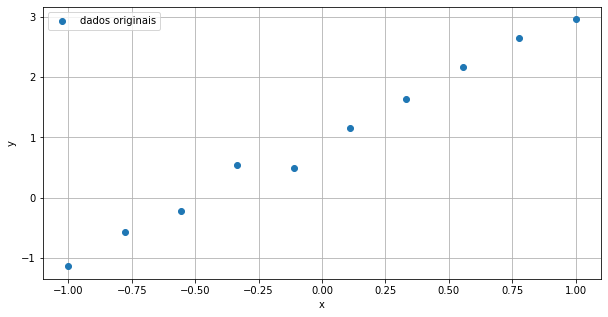

In [14]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais') # usando 'o' significa scatter
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [15]:
"""
Iremos estimar uma função do tipo: y = a*x + b
ou seja, devemos achar quais os valores de a e b
que melhor representam os dados.

Os valores reais de a e b são: (a, b): 2, 1
"""

# transformando para numpy e vetor coluna
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

# adicionando bias: para estimar o termo b
X = np.hstack((x,np.ones(x.shape)))

#estimando a e b
beta = np.linalg.pinv(X).dot(y) # método para calcular a pseudo inversa
print('a estimado:', beta[0][0])
print('b estimado:', beta[1] [0])

a estimado: 2.054149512038485
b estimado: 0.967989262
